In [37]:
# New project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv("Airbnb_Open_Data.csv", low_memory=False, on_bad_lines='skip')

In [39]:
print(df['room type'].value_counts())

room type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [41]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [42]:
#Checking total missing values
df.isnull().sum()

,0
id,0
NAME,250
host id,0
host_identity_verified,289
host name,406
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [43]:
# ✅ Convert 'last review' to datetime early
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

In [44]:
# Service fee and price converting to float from string
df['service fee'] = df['service fee'].str.replace('[\$,]', '', regex=True).astype(float)
df['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(float)

# Drop columns with mostly missing values
df.drop(columns=['license', 'house_rules'], inplace=True)

# Interpolate numeric values
for col in ['price', 'number of reviews', 'review rate number', 'lat', 'long',
            'service fee', 'minimum nights', 'calculated host listings count',
            'availability 365', 'Construction year']:
    df[col] = df[col].interpolate()

# Fill text column with placeholder
df['NAME'] = df['NAME'].fillna('Unnamed Listing')

# Fill with zero where missing value means none
df['reviews per month'] = df['reviews per month'].fillna(0)
df['number of reviews'] = df['number of reviews'].fillna(0)

# Don't overwrite datetime column — optionally create a label column if needed
# df['last review'] = df['last review'].fillna('No Review')

# Mode because of frequency of data
categorical_cols = ['host name', 'host_identity_verified', 'cancellation_policy',
                    'instant_bookable', 'neighbourhood group', 'neighbourhood',
                    'country', 'country code']

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Optional: Final fill in case interpolation missed any numeric values (e.g. at edges)
numeric_cols = ['price', 'number of reviews', 'review rate number', 'lat', 'long',
                'service fee', 'minimum nights', 'calculated host listings count',
                'availability 365', 'Construction year']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


<ipython-input-44-2ca581308cf6>:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [45]:
# Final check
print("Remaining missing values:", df.isnull().sum().sum())  # Should be 0

print(df[df['room type'].isnull()])

print(df[df['host id'].isnull()])

df = df.dropna(subset=['room type', 'host id'])

df['last review']

Remaining missing values: 15893
Empty DataFrame
Columns: [id, NAME, host id, host_identity_verified, host name, neighbourhood group, neighbourhood, lat, long, country, country code, instant_bookable, cancellation_policy, room type, Construction year, price, service fee, minimum nights, number of reviews, last review, reviews per month, review rate number, calculated host listings count, availability 365]
Index: []

[0 rows x 24 columns]
Empty DataFrame
Columns: [id, NAME, host id, host_identity_verified, host name, neighbourhood group, neighbourhood, lat, long, country, country code, instant_bookable, cancellation_policy, room type, Construction year, price, service fee, minimum nights, number of reviews, last review, reviews per month, review rate number, calculated host listings count, availability 365]
Index: []

[0 rows x 24 columns]


,last review
0,2021-10-19
1,2022-05-21
2,NaT
3,2019-07-05
4,2018-11-19
...,...
102594,NaT
102595,2015-07-06
102596,NaT
102597,2015-10-11


In [46]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,86706,102599.000000,102599.000000,102599.000000,102599.000000
mean,2.914623e+07,4.925411e+10,40.728095,-73.949647,2012.490122,625.115893,125.016935,8.153505,27.464688,2019-06-12 03:40:52.065601024,1.161368,3.278039,7.917938,141.314145
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2008.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.480000,3.000000,1.000000,97.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,913.000000,182.000000,5.000000,30.000000,2019-07-05 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055855,0.049520,5.763141,331.552254,66.290508,30.585715,49.490984,NaN,1.680924,1.283873,32.170555,135.343881


## Visualization

In [47]:
# Step 1: Define your custom price bins (using your specific ranges)
price_bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]

# Step 2: Create labels for each new bin
price_labels = [
    "$0–100", "$101–200", "$201–300", "$301–400", "$401–500",
    "$501–600", "$601–700", "$701–800", "$801–900", "$901–1000", "$1000+"
]

# Step 3: Use pd.cut to bucket the price values
df['price range'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=True)

# Step 4: Count listings in each range
price_distribution = df['price range'].value_counts().sort_index()

# Step 5 (optional): Convert to DataFrame for a table-like format
price_table = price_distribution.reset_index()
price_table.columns = ['Price Range', 'Number of Listings']

# Show the table
print(price_table)


   Price Range  Number of Listings
0       $0–100                4482
1     $101–200                8837
2     $201–300                8919
3     $301–400                8723
4     $401–500                9170
5     $501–600                9012
6     $601–700                9029
7     $701–800                8912
8     $801–900                8735
9    $901–1000                8975
10      $1000+               17805


<ipython-input-48-a7b4c5d5cda3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_table['Price Range'], y=price_table['Number of Listings'], palette='viridis')


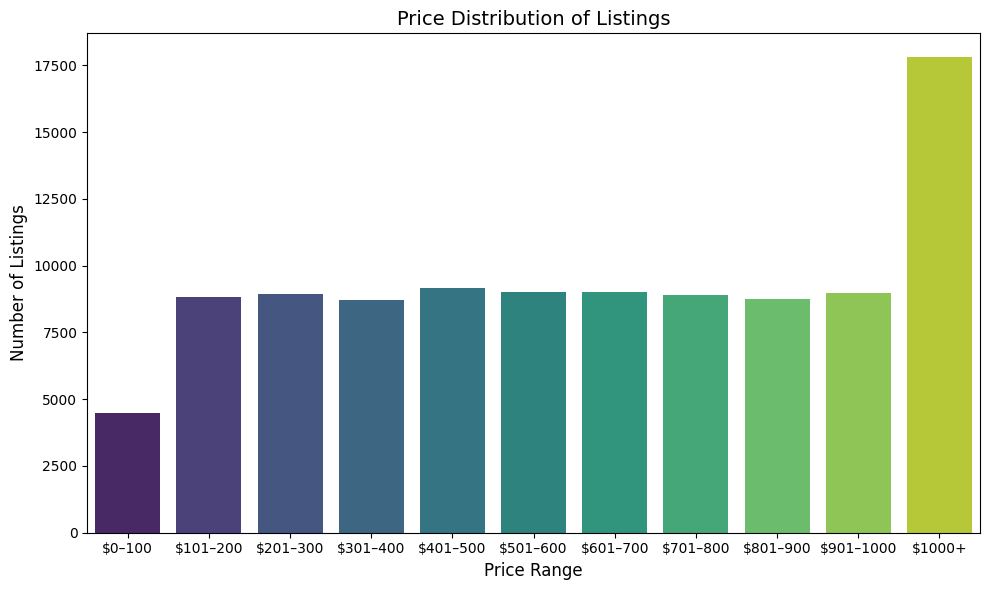

In [48]:
# Plotting the price distribution table
plt.figure(figsize=(10, 6))

# Create the barplot using Seaborn
sns.barplot(x=price_table['Price Range'], y=price_table['Number of Listings'], palette='viridis')

# Add labels and title
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.title('Price Distribution of Listings', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [49]:
print(df['room type'].unique())

['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


In [50]:
df['room type']

,room type
0,Private room
1,Entire home/apt
2,Private room
3,Entire home/apt
4,Entire home/apt
...,...
102594,Private room
102595,Private room
102596,Private room
102597,Entire home/apt


In [51]:
room_type = df['room type'].value_counts().sort_values(ascending=False)
print(room_type)

room type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64


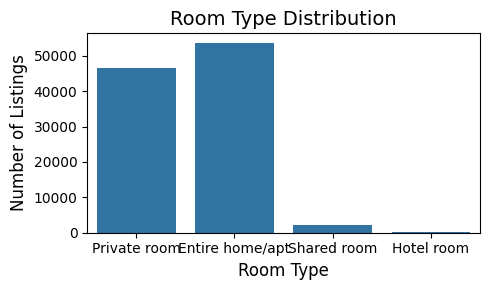

In [52]:
plt.figure(figsize =(5,3))
sns.countplot(data=df, x='room type')
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.title('Room Type Distribution', fontsize=14)
plt.tight_layout()
plt.show()

In [53]:
df['neighbourhood group'] = df['neighbourhood group'].replace({
    'manhatan': 'Manhattan',
    'brookln': 'Brooklyn'
})

In [54]:
neighbourhood_type = df['neighbourhood group'].value_counts().sort_values(ascending=False)
print(neighbourhood_type)

neighbourhood group
Manhattan        43822
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Name: count, dtype: int64


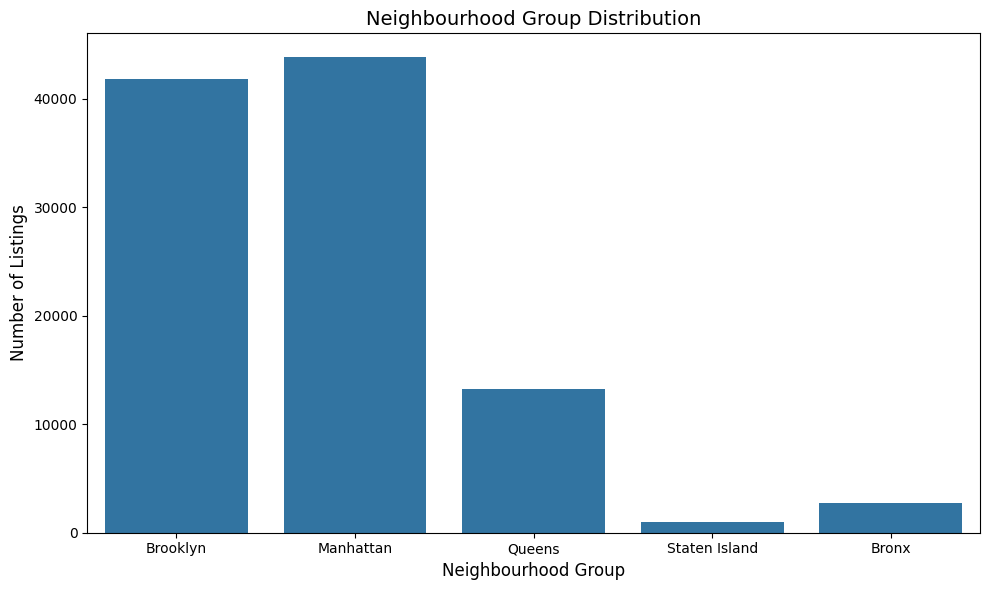

In [55]:
plt.figure(figsize = (10,6))
sns.countplot(data=df, x='neighbourhood group')
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.title('Neighbourhood Group Distribution', fontsize=14)
plt.tight_layout()
plt.show()

# Relationship between Price and Room Type

<ipython-input-56-0b49065aef50>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='room type', y='price', showfliers=False, palette='pastel')


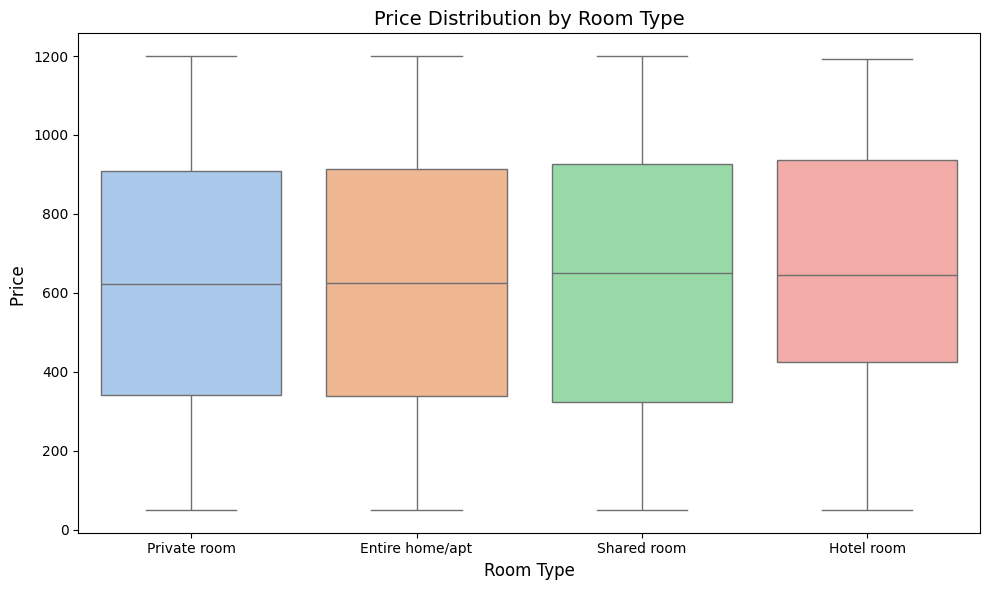

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room type', y='price', showfliers=False, palette='pastel')
#plt.yscale('log')  # Optional: log scale to reduce skew from outliers
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price ', fontsize=12)
plt.title('Price Distribution by Room Type', fontsize=14)
#plt.legend(title = 'Room Type')
plt.tight_layout()
plt.show()


In [57]:
top_hosts = df['host name'].value_counts().head(5)
print("Top Hosts are: ", top_hosts)

Top Hosts are:  host name
Michael         1287
David            764
John             581
Alex             546
Sonder (NYC)     516
Name: count, dtype: int64


In [58]:
top_host_names = top_hosts.index.tolist()
top_host_df = df[df['host name'].isin(top_host_names)]


In [59]:
# Group by host name and get the neighbourhood groups they operate in
host_neighbourhoods = top_host_df.groupby('host name')['neighbourhood group'].value_counts()

print(host_neighbourhoods)


host name     neighbourhood group
Alex          Manhattan              255
              Brooklyn               243
              Queens                  36
              Bronx                    7
              Staten Island            5
David         Manhattan              375
              Brooklyn               269
              Queens                 104
              Staten Island            9
              Bronx                    7
John          Manhattan              276
              Brooklyn               219
              Queens                  72
              Bronx                    7
              Staten Island            7
Michael       Manhattan              606
              Brooklyn               511
              Queens                 130
              Bronx                   22
              Staten Island           18
Sonder (NYC)  Manhattan              515
              Brooklyn                 1
Name: count, dtype: int64


In [60]:
host_neighbourhoods_df = top_host_df.groupby(['host name', 'neighbourhood group']).size().reset_index(name='listings')


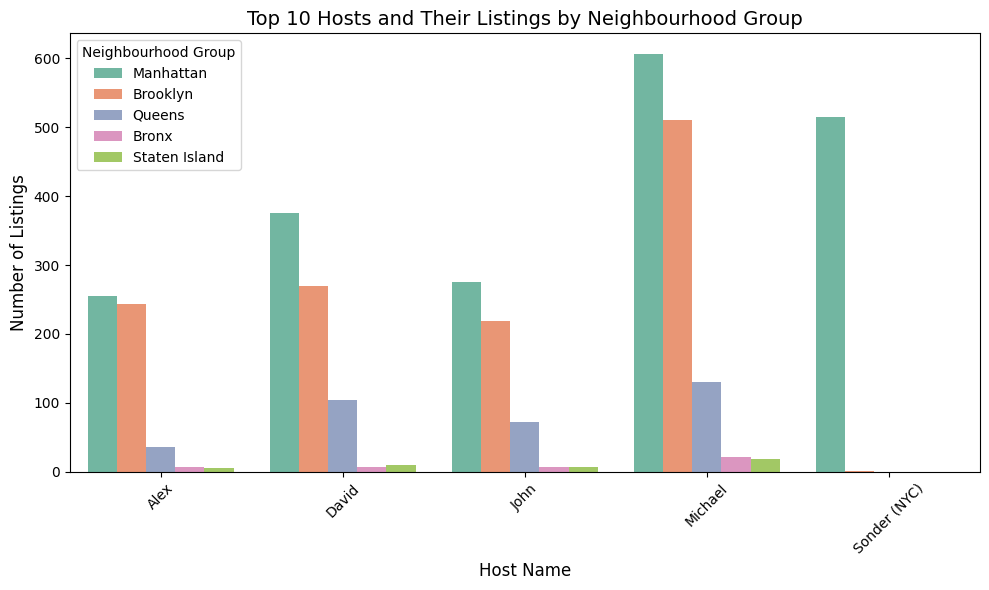

In [61]:
order = df.groupby('neighbourhood group').size().sort_values(ascending=False).index

plt.figure(figsize = (10,6))
sns.barplot(
    data=host_neighbourhoods_df,
    x='host name',
    y='listings',
    hue='neighbourhood group',
    hue_order=order,
    palette='Set2'
)


plt.title('Top 10 Hosts and Their Listings by Neighbourhood Group', fontsize=14)
plt.xlabel('Host Name', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.legend(title='Neighbourhood Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


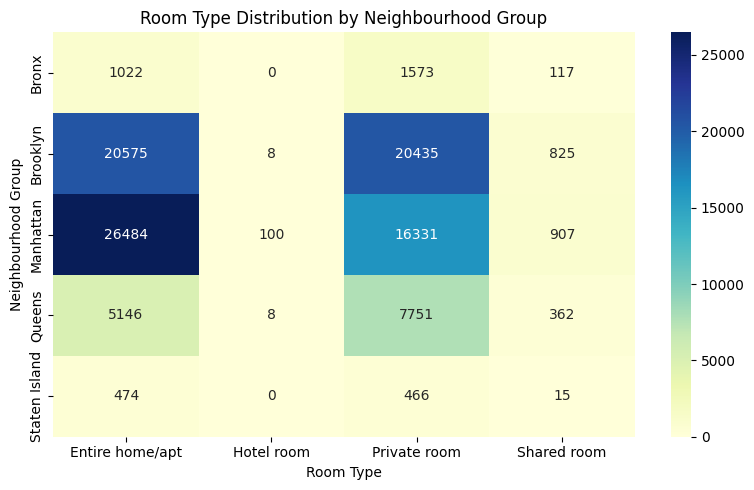

In [62]:
pivot_table = pd.crosstab(df['neighbourhood group'], df['room type'])

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Room Type Distribution by Neighbourhood Group')
plt.xlabel('Room Type')
plt.ylabel('Neighbourhood Group')
plt.tight_layout()
plt.show()


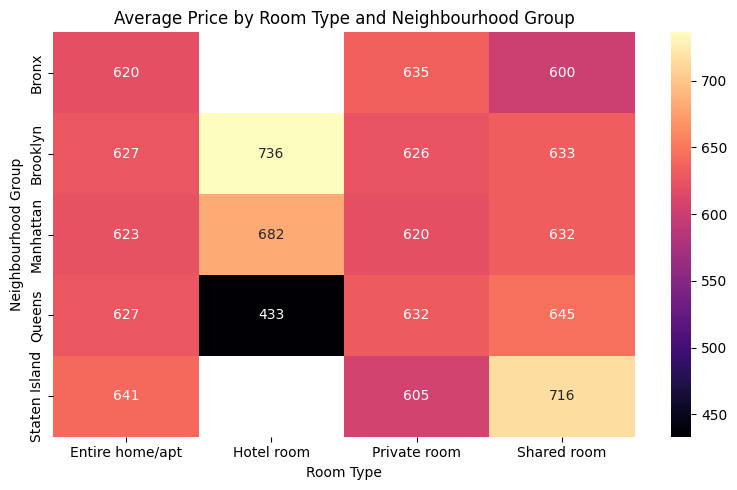

In [63]:
avg_price = df.groupby(['neighbourhood group', 'room type'])['price'].mean().unstack()

plt.figure(figsize=(8, 5))
sns.heatmap(avg_price, annot=True, fmt='.0f', cmap='magma')
plt.title('Average Price by Room Type and Neighbourhood Group')
plt.xlabel('Room Type')
plt.ylabel('Neighbourhood Group')
plt.tight_layout()
plt.show()


Average Review Ratings:
is_top_host
Other Hosts    3.277718
Top Host       3.286632
Name: review rate number, dtype: float64


<ipython-input-67-64813e32f530>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_top_host', y='review rate number', palette='coolwarm')


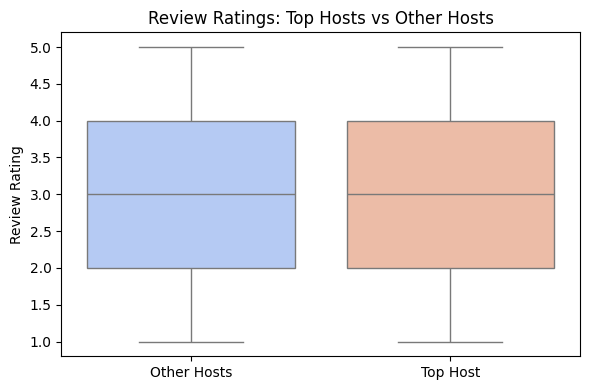

'# Step 5: Statistical Test (T-test)\ntop_reviews = df[df[\'is_top_host\'] == \'Top Host\'][\'review rate number\'].dropna()\nother_reviews = df[df[\'is_top_host\'] == \'Other Hosts\'][\'review rate number\'].dropna()\n\nt_stat, p_val = ttest_ind(top_reviews, other_reviews, equal_var=False)\nprint(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")\n\n# Interpretation\nif p_val < 0.05:\n    print("The difference in review ratings is statistically significant.")\nelse:\n    print("The difference in review ratings is not statistically significant.")'

In [67]:
from scipy.stats import ttest_ind
# Step 2: Create a Column to Flag Top Hosts
df['is_top_host'] = df['host name'].apply(lambda x: 'Top Host' if x in top_hosts else 'Other Hosts')

# Step 3: Compare Review Ratings (Mean)
avg_reviews = df.groupby('is_top_host')['review rate number'].mean()
print("Average Review Ratings:")
print(avg_reviews)

# Step 4: Visualization of Review Ratings by Host Type
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='is_top_host', y='review rate number', palette='coolwarm')
plt.title('Review Ratings: Top Hosts vs Other Hosts')
plt.xlabel('')
plt.ylabel('Review Rating')
plt.tight_layout()
plt.show()

'''# Step 5: Statistical Test (T-test)
top_reviews = df[df['is_top_host'] == 'Top Host']['review rate number'].dropna()
other_reviews = df[df['is_top_host'] == 'Other Hosts']['review rate number'].dropna()

t_stat, p_val = ttest_ind(top_reviews, other_reviews, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

# Interpretation
if p_val < 0.05:
    print("The difference in review ratings is statistically significant.")
else:
    print("The difference in review ratings is not statistically significant.")'''